# Import Library

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import pickle

# Load Dataset

In [2]:
df = pd.read_csv('Dataset_A_loan.csv')

In [3]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [4]:
df.shape

(45000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

# Define fitur dan target

In [7]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Split data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.isnull().sum()

person_age                           0
person_gender                        0
person_education                     0
person_income                     1769
person_emp_exp                       0
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
dtype: int64

In [10]:
X_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
25180,34.0,female,Bachelor,97265.0,11,MORTGAGE,15000.0,PERSONAL,12.73,0.15,9.0,631,No
12555,25.0,male,High School,NaN,3,RENT,12000.0,VENTURE,11.86,0.16,4.0,659,Yes
29153,41.0,female,Master,322597.0,18,MORTGAGE,24000.0,PERSONAL,10.37,0.07,11.0,683,Yes
23838,27.0,male,Associate,94232.0,4,RENT,9600.0,EDUCATION,17.14,0.10,7.0,641,No
35686,27.0,male,Master,NaN,7,RENT,7059.0,HOMEIMPROVEMENT,12.97,0.08,3.0,706,Yes


In [11]:
y_train.head()

25180    0
12555    0
29153    0
23838    0
35686    0
Name: loan_status, dtype: int64

In [12]:
X_train.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'],
      dtype='object')

In [13]:
X_train.shape

(36000, 13)

In [14]:
X_test.shape

(9000, 13)

# Handle Missing Value

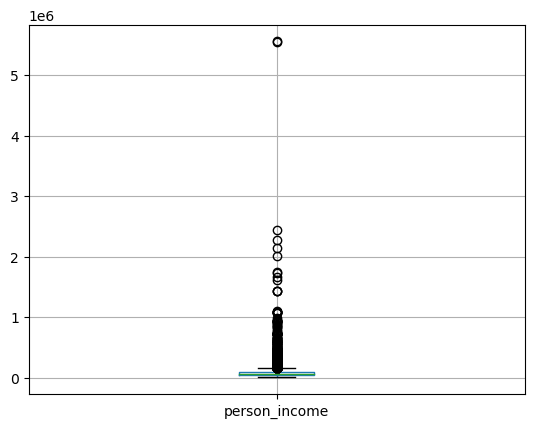

In [15]:
boxplot = X_train.boxplot(column=['person_income'])
plt.show()

keliatan diatas boxplotnya skewed ke kanan soalnya outliernya banyak sekali. Maka, utk ganti nilai NaN nya pakai median karena lebih robust terhadap outlier dibanding mean.

In [16]:
#median person income
print('mean person income:',np.median(X_train['person_income']))

mean person income: nan


In [17]:
#masukin median ke na train sm test
X_train['person_income'] = X_train['person_income'].fillna(70273.5)
X_test['person_income'] = X_test['person_income'].fillna(70273.5)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36000 entries, 25180 to 15795
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_gender                   36000 non-null  object 
 2   person_education                36000 non-null  object 
 3   person_income                   36000 non-null  float64
 4   person_emp_exp                  36000 non-null  int64  
 5   person_home_ownership           36000 non-null  object 
 6   loan_amnt                       36000 non-null  float64
 7   loan_intent                     36000 non-null  object 
 8   loan_int_rate                   36000 non-null  float64
 9   loan_percent_income             36000 non-null  float64
 10  cb_person_cred_hist_length      36000 non-null  float64
 11  credit_score                    36000 non-null  int64  
 12  previous_loan_defaults_on_file  3

In [19]:
#ngehandle data inkonsisten
X_train['person_gender'] = X_train['person_gender'].replace({
    'Male': 'male',
    'fe male': 'female'
})

X_test['person_gender'] = X_test['person_gender'].replace({
    'Male': 'male',
    'fe male': 'female'
})

# Label encoding

In [20]:
X_train['previous_loan_defaults_on_file'] = X_train['previous_loan_defaults_on_file'].map({"No":0, "Yes":1})
X_train['person_gender'] = X_train['person_gender'].map({"male":0, "female":1})

X_test['previous_loan_defaults_on_file'] = X_test['previous_loan_defaults_on_file'].map({"No":0, "Yes":1})
X_test['person_gender'] = X_test['person_gender'].map({"male":0, "female":1})

# One hot encoding

In [21]:
onehot_category = ['person_education', 'person_home_ownership', 'loan_intent']

encoding = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), onehot_category)], remainder='passthrough')  

X_train = encoding.fit_transform(X_train)
X_test = encoding.transform(X_test)

# Random Forest Classifier

In [22]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

# XGBoost Classifier

In [23]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)

# Bandingkan hasil

In [24]:
print("Random Forest Classification report:\n", classification_report(y_test, rf_preds))
print("\nXGBoost Classification report:\n", classification_report(y_test, xgb_preds))

Random Forest Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.90      0.76      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000


XGBoost Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.88      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [25]:
print("Random Forest Accuracy:", rf_acc)
print("\nXGBoost Accuracy:", xgb_acc)

Random Forest Accuracy: 0.928

XGBoost Accuracy: 0.9318888888888889


In [26]:
rf_train = rf.predict(X_train)
xgb_train = xgb.predict(X_train)

In [27]:
#bandingin sama data training
print(accuracy_score(y_train, rf_train))
print(accuracy_score(y_train, xgb_train))

1.0
0.9685833333333334


Kesimpulan : Model XgBoost akurasinya lebih baik, dan tdk overfit berlebih

# Pilih model terbaik dan simpan model

In [28]:
best_model = xgb

with open('encoding.pkl', 'wb') as f:
    pickle.dump(encoding, f)

with open('xgb.pkl', 'wb') as f:
    pickle.dump(xgb, f)